In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [30]:
image = cv2.imread('sar_1_gray.jpg')

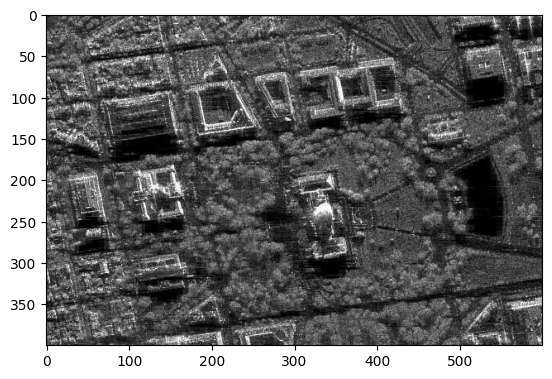

In [31]:
plt.imshow(image)

In [32]:
image.shape # h,w,c

(400, 600, 3)

In [33]:
image[250,250] # b,g,r

array([74, 74, 74], dtype=uint8)

In [34]:
# ROI
img_roi = image[100:200, 500:700]

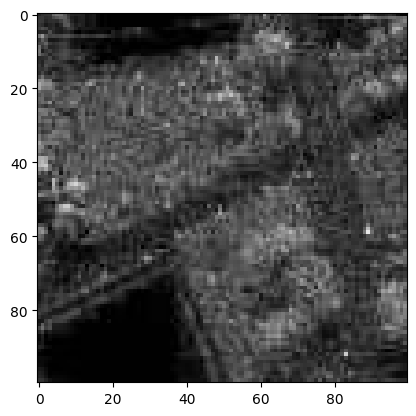

In [35]:
plt.imshow(img_roi)

In [36]:
b,g,r = cv2.split(image)

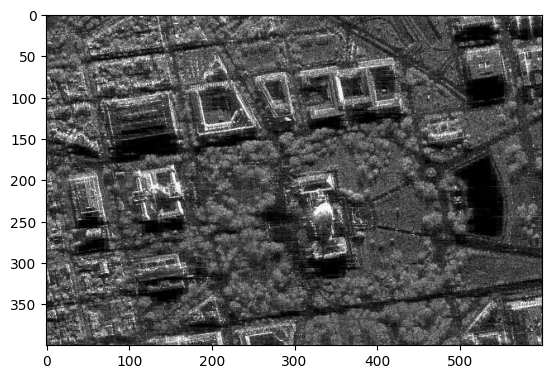

In [37]:
plt.imshow(b, cmap = 'gray')

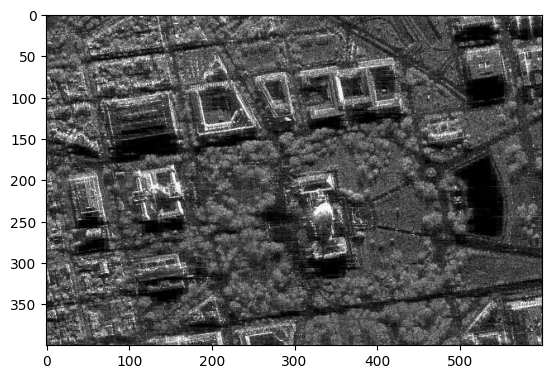

In [38]:
plt.imshow(g, cmap = 'gray')

In [39]:
# alternative approach
b = image[:,:,0]

In [40]:
import copy

image2 = copy.deepcopy(image)

In [41]:
image2[50:100,50:100] = [0,0,0]

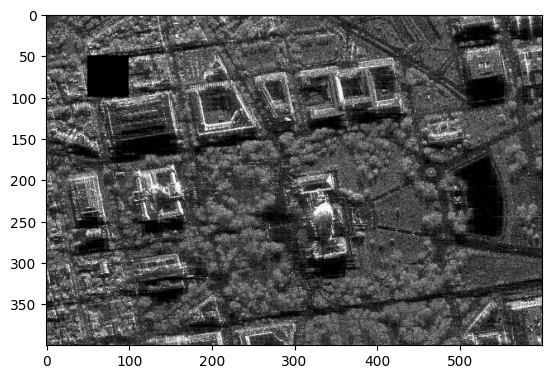

In [42]:
plt.imshow(image2)

In [43]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

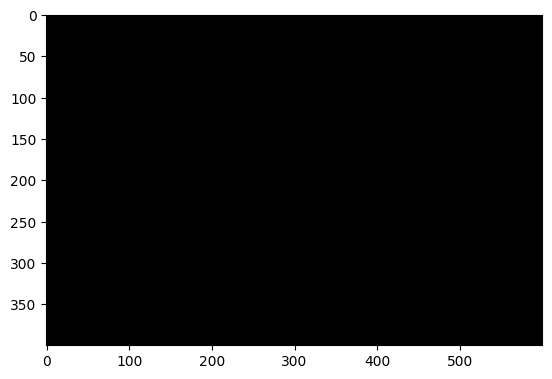

In [44]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [45]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [46]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [47]:
image_gray[0,0]

np.uint8(23)

In [48]:
image_gray.shape

(400, 600)

In [49]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [50]:
image_hsv.shape

(400, 600, 3)

In [51]:
image_hsv[0,0]

array([ 0,  0, 23], dtype=uint8)

In [52]:
image[0,0]

array([23, 23, 23], dtype=uint8)

In [53]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [54]:
image_lab[0,0]

array([ 19, 128, 128], dtype=uint8)

# Пороговая фильтрация

In [55]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

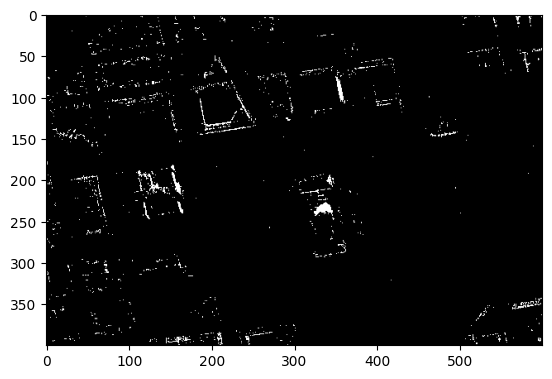

In [56]:
plt.imshow(thresh1, cmap='gray')

In [57]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [58]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

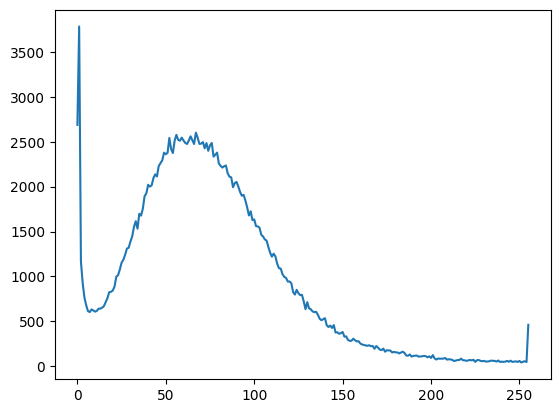

In [59]:
plt.plot(b_hist)

In [60]:
b_hist_cum = b_hist.cumsum()

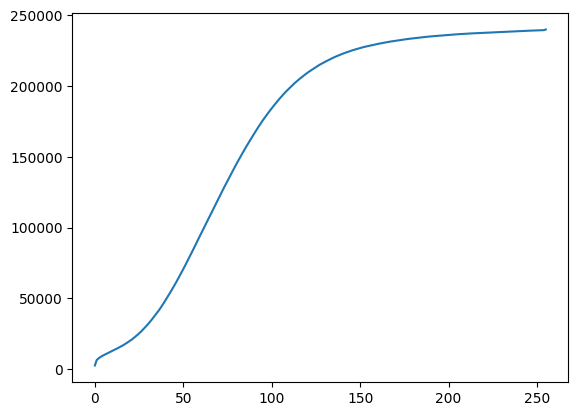

In [61]:
plt.plot(b_hist_cum)

In [62]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

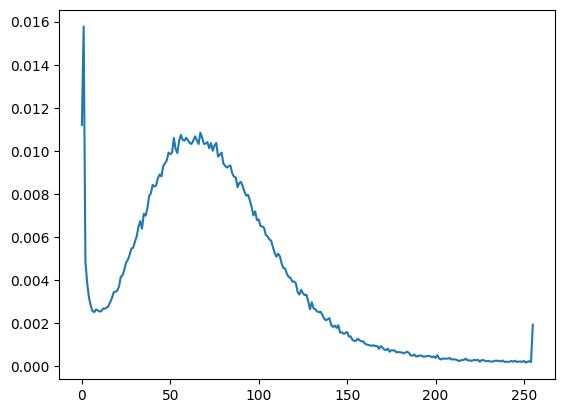

In [63]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [64]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


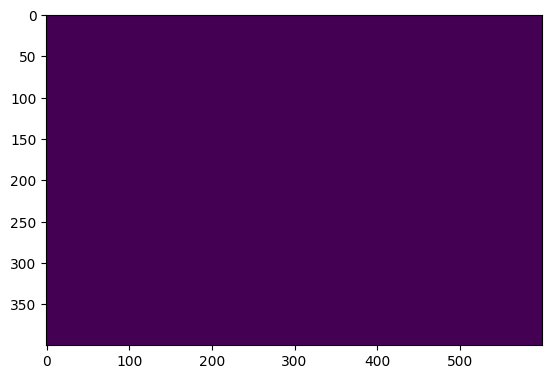

In [65]:
plt.imshow(diff)

In [66]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [67]:
mean = image_gray.mean()

In [68]:
std = image_gray.std()

In [69]:
print(mean,std)

74.94157083333333 43.658465466227916


In [70]:
eq_gray = cv2.equalizeHist(image_gray)

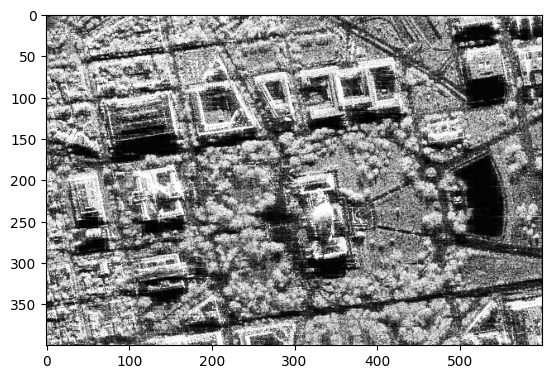

In [71]:
plt.imshow(eq_gray, cmap="gray")


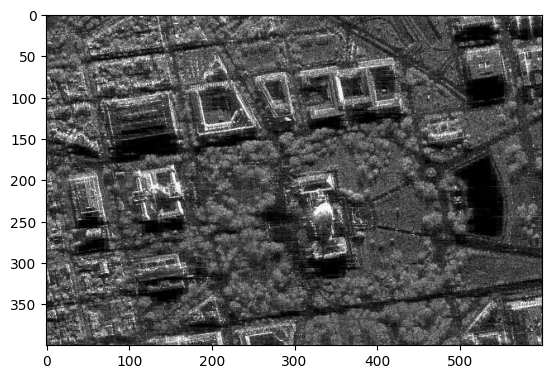

In [72]:
plt.imshow(image_gray, cmap="gray")

In [73]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

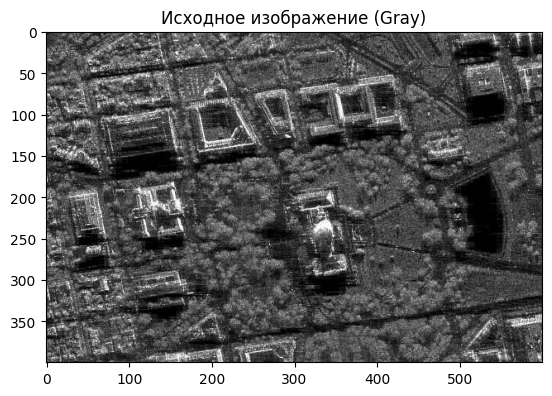

In [15]:
image_gray = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение (Gray)")
plt.show()

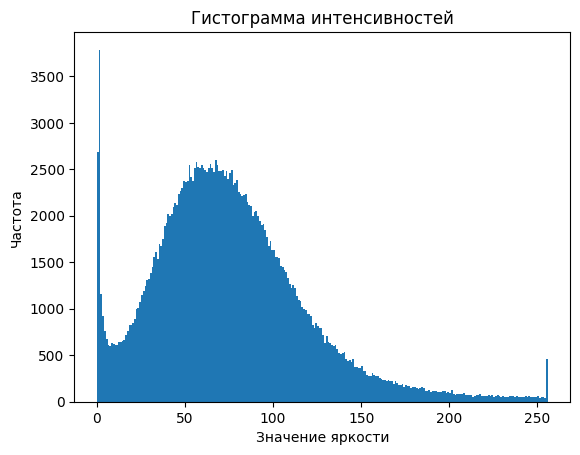

In [16]:
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.title("Гистограмма интенсивностей")
plt.xlabel("Значение яркости")
plt.ylabel("Частота")
plt.show()

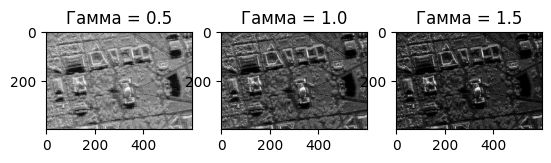

In [17]:
def gamma_correction(image, gamma=1.0):
    image_normalized = image.astype(np.float32) / 255.0
    corrected = np.power(image_normalized, gamma)
    return (corrected * 255).astype(np.uint8)

gamma_values = [0.5, 1.0, 1.5]
gamma_images = []
    
for i, gamma in enumerate(gamma_values):
    gamma_img = gamma_correction(image_gray, gamma)
    gamma_images.append(gamma_img)
        
    plt.subplot(2, 3, i+1)
    plt.imshow(gamma_img, cmap='gray')
    plt.title(f'Гамма = {gamma}')

plt.show()

In [18]:
for i, gamma in enumerate(gamma_values):
    if gamma != 1.0:  
        mse = mean_squared_error(image_gray, gamma_images[i])
            
        min_dim = min(image_gray.shape)
        win_size = min(7, min_dim if min_dim % 2 == 1 else min_dim - 1)           
        ssim = structural_similarity(image_gray, gamma_images[i], 
                                      win_size=win_size, 
                                      data_range=255)        
        print(f"Гамма = {gamma}")
        print(f"  MSE = {mse}")
        print(f"  SSIM = {ssim}")

Гамма = 0.5
  MSE = 3250.429145833333
  SSIM = 0.7875008686792753
Гамма = 1.5
  MSE = 971.8206541666667
  SSIM = 0.8065788107754002


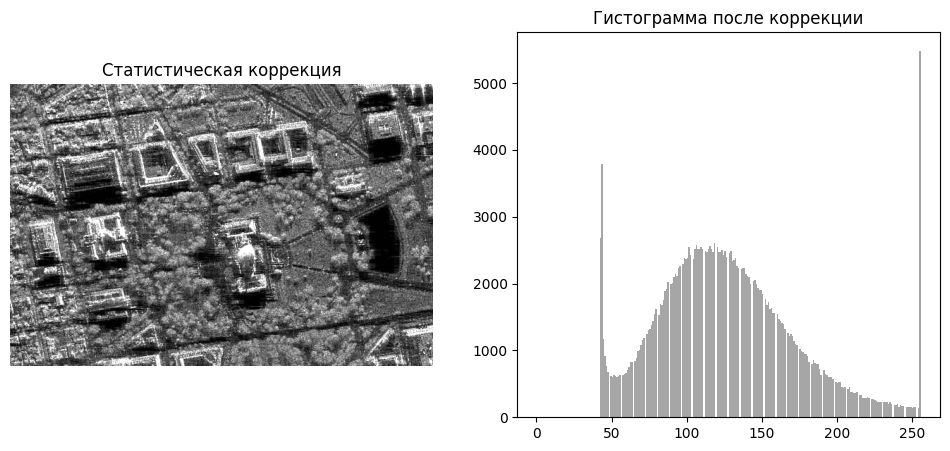

MSE = 2723.1328708333335
SSIM = 0.8227000439109768


In [19]:
def statistical_correction(image, target_mean=128, target_std=50):
    current_mean = np.mean(image)
    current_std = np.std(image)
        
    corrected = (image - current_mean) * (target_std / current_std) + target_mean
    corrected = np.clip(corrected, 0, 255)        
    return corrected.astype(np.uint8)

stat_corrected = statistical_correction(image_gray)
    
plt.figure(figsize=(12, 5))
    
plt.subplot(1, 2, 1)
plt.imshow(stat_corrected, cmap='gray')
plt.title('Статистическая коррекция')
plt.axis('off')
    
plt.subplot(1, 2, 2)
plt.hist(stat_corrected.ravel(), bins=256, range=[0, 256], color='gr, alpha=0.7)
plt.title('Гистограмма после коррекции')

plt.show()

mse_stat = mean_squared_error(image_gray, stat_corrected)
ssim_stat = structural_similarity(image_gray, stat_corrected, 
                                   win_size=win_size, 
                                   data_range=255)
print(f"MSE = {mse_stat}")
print(f"SSIM = {ssim_stat}")

Порог 100: 23.2% белых пикселей
Порог 128: 10.1% белых пикселей
Порог 150: 5.5% белых пикселей
Порог 180: 2.6% белых пикселей


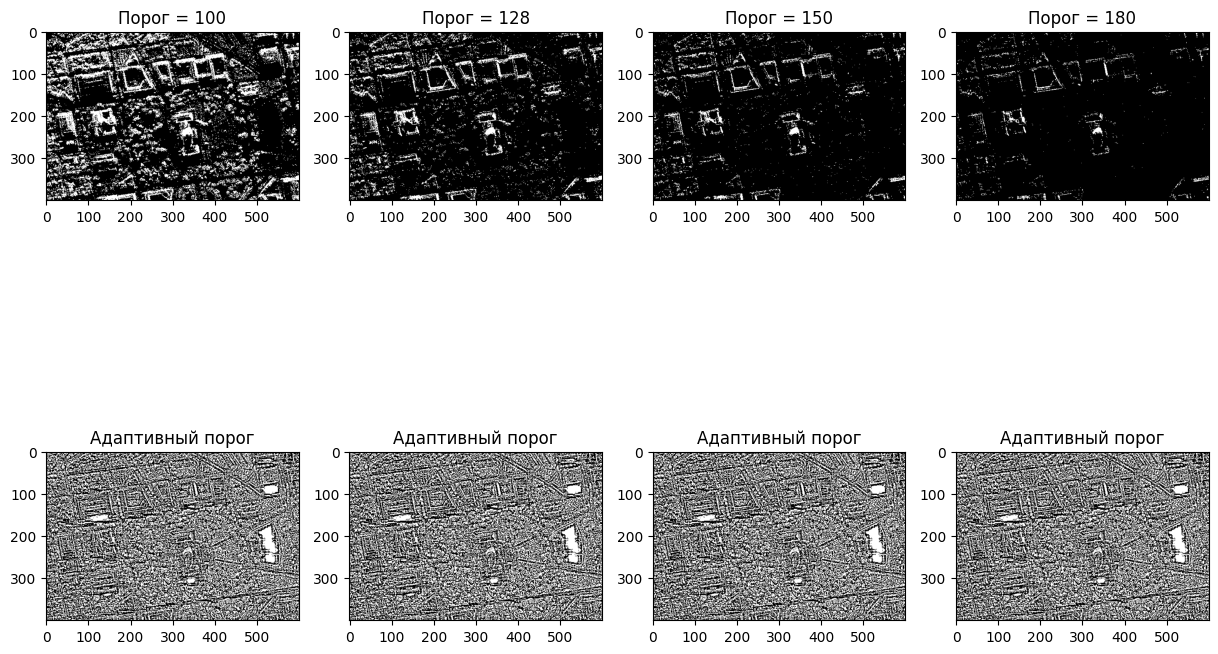

In [20]:
threshold_values = [100, 128, 150, 180]
    
plt.figure(figsize=(15, 10))
    
for i, threshold in enumerate(threshold_values):
    retval, binary = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)
        
    adaptive = cv2.adaptiveThreshold(image_gray, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 11, 2)      
    plt.subplot(2, 4, i+1)
    plt.imshow(binary, cmap='gray')
    plt.title(f'Порог = {threshold}')

        
    plt.subplot(2, 4, i+5)
    plt.imshow(adaptive, cmap='gray')
    plt.title(f'Адаптивный порог')

    white_pixels = np.sum(binary == 255)
    total_pixels = binary.size
    white_percentage = (white_pixels / total_pixels) * 100
    
    print(f"Порог {threshold}: {white_percentage:.1f}% белых пикселей")

plt.show()